## This first cell loads health insurance data into a DataFrame

In [1]:
import pandas as pd

df_health = pd.read_csv('http://neueda.conygre.com/pydata/ml_fc/health_insurance_trimmed.csv', index_col=0)
df_health

age  gender    bmi  children smoker     region     charges
1      18    male  33.77         1     no  southeast   1725.5523
2      28    male  33.00         3     no  southeast   4449.4620
4      32    male  28.88         0     no  northwest   3866.8552
5      31  female  25.74         0     no  southeast   3756.6216
6      46  female  33.44         1     no  southeast   8240.5896
...   ...     ...    ...       ...    ...        ...         ...
1332   52  female  44.70         3     no  southwest  11411.6850
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450

[980 rows x 7 columns]

## Data Preparation
We will prepare the data in a simple way by creating some calculated columns that use numerical codes instead of text values

Creat a new column called "charge_category". This will contain a code indicating what range of charges this person fell into. i.e.:

* category 0 : annual charges < 3000
* category 1 : 3000 <= annual charges < 5000
* category 2 : 5000 <= annual charges < 10000
* category 3 : 10000 <= annual charges

In [2]:
df_health['charge_category'] = 0

In [3]:
df_health

age  gender    bmi  children smoker     region     charges  \
1      18    male  33.77         1     no  southeast   1725.5523   
2      28    male  33.00         3     no  southeast   4449.4620   
4      32    male  28.88         0     no  northwest   3866.8552   
5      31  female  25.74         0     no  southeast   3756.6216   
6      46  female  33.44         1     no  southeast   8240.5896   
...   ...     ...    ...       ...    ...        ...         ...   
1332   52  female  44.70         3     no  southwest  11411.6850   
1333   50    male  30.97         3     no  northwest  10600.5483   
1334   18  female  31.92         0     no  northeast   2205.9808   
1335   18  female  36.85         0     no  southeast   1629.8335   
1336   21  female  25.80         0     no  southwest   2007.9450   

      charge_category  
1                   0  
2                   0  
4                   0  
5                   0  
6                   0  
...               ...  
1332                0  
1333                0  
1334                0  
1335                0  
1336                0  

[980 rows x 8 columns]

In [4]:
# if health charges are less than 3000 we'll call this category 0
df_health.loc[ df_health['charges'] < 3000 , 'charge_category'] = 0

# if health charges are between 3000 and 5000 we'll call this category 1
df_health.loc[ (df_health['charges'] >= 3000) &  (df_health['charges'] < 5000), 'charge_category'] = 1

# if health charges are between 5000 and 10000 we'll call this category 2
df_health.loc[ (df_health['charges'] >= 5000) &  (df_health['charges'] < 10000), 'charge_category'] = 2

# if health charges are greater than 10000 we'll call this category 3 
df_health.loc[ df_health['charges'] >= 10000, 'charge_category'] = 3
df_health

age  gender    bmi  children smoker     region     charges  \
1      18    male  33.77         1     no  southeast   1725.5523   
2      28    male  33.00         3     no  southeast   4449.4620   
4      32    male  28.88         0     no  northwest   3866.8552   
5      31  female  25.74         0     no  southeast   3756.6216   
6      46  female  33.44         1     no  southeast   8240.5896   
...   ...     ...    ...       ...    ...        ...         ...   
1332   52  female  44.70         3     no  southwest  11411.6850   
1333   50    male  30.97         3     no  northwest  10600.5483   
1334   18  female  31.92         0     no  northeast   2205.9808   
1335   18  female  36.85         0     no  southeast   1629.8335   
1336   21  female  25.80         0     no  southwest   2007.9450   

      charge_category  
1                   0  
2                   1  
4                   1  
5                   1  
6                   2  
...               ...  
1332                3  
1333                3  
1334                0  
1335                0  
1336                0  

[980 rows x 8 columns]

## Assign a code for gender
* female : 0
* male : 1

In [5]:
df_health['gender_code'] = 0
df_health.loc[ df_health['gender'] == 'male', 'gender_code'] = 1
df_health

age  gender    bmi  children smoker     region     charges  \
1      18    male  33.77         1     no  southeast   1725.5523   
2      28    male  33.00         3     no  southeast   4449.4620   
4      32    male  28.88         0     no  northwest   3866.8552   
5      31  female  25.74         0     no  southeast   3756.6216   
6      46  female  33.44         1     no  southeast   8240.5896   
...   ...     ...    ...       ...    ...        ...         ...   
1332   52  female  44.70         3     no  southwest  11411.6850   
1333   50    male  30.97         3     no  northwest  10600.5483   
1334   18  female  31.92         0     no  northeast   2205.9808   
1335   18  female  36.85         0     no  southeast   1629.8335   
1336   21  female  25.80         0     no  southwest   2007.9450   

      charge_category  gender_code  
1                   0            1  
2                   1            1  
4                   1            1  
5                   1            0  
6                   2            0  
...               ...          ...  
1332                3            0  
1333                3            1  
1334                0            0  
1335                0            0  
1336                0            0  

[980 rows x 9 columns]

## Assign a code for smoking/non-smoking
* smoker : 1
* non-smoker : 0

In [6]:
df_health['smoker_code'] = 0
df_health.loc[ df_health['smoker'] == 'yes', 'smoker_code'] = 1
df_health

age  gender    bmi  children smoker     region     charges  \
1      18    male  33.77         1     no  southeast   1725.5523   
2      28    male  33.00         3     no  southeast   4449.4620   
4      32    male  28.88         0     no  northwest   3866.8552   
5      31  female  25.74         0     no  southeast   3756.6216   
6      46  female  33.44         1     no  southeast   8240.5896   
...   ...     ...    ...       ...    ...        ...         ...   
1332   52  female  44.70         3     no  southwest  11411.6850   
1333   50    male  30.97         3     no  northwest  10600.5483   
1334   18  female  31.92         0     no  northeast   2205.9808   
1335   18  female  36.85         0     no  southeast   1629.8335   
1336   21  female  25.80         0     no  southwest   2007.9450   

      charge_category  gender_code  smoker_code  
1                   0            1            0  
2                   1            1            0  
4                   1            1            0  
5                   1            0            0  
6                   2            0            0  
...               ...          ...          ...  
1332                3            0            0  
1333                3            1            0  
1334                0            0            0  
1335                0            0            0  
1336                0            0            0  

[980 rows x 10 columns]

### Now train a logistic regression model to predict the charge category for a person
Separate the dataframe into:

* X: independent variable matrix  - this is the first 4 columns
* y: dependant variable vector    - this is just the 'class' column

In [7]:
# Make a variable called X here that contains just the first 4 columns of df_health
X = df_health.loc[:, ['age', 'gender_code', 'bmi', 'children', 'smoker_code']]
y = df_health['charge_category']
display(X)
display(y)

age  gender_code    bmi  children  smoker_code
1      18            1  33.77         1            0
2      28            1  33.00         3            0
4      32            1  28.88         0            0
5      31            0  25.74         0            0
6      46            0  33.44         1            0
...   ...          ...    ...       ...          ...
1332   52            0  44.70         3            0
1333   50            1  30.97         3            0
1334   18            0  31.92         0            0
1335   18            0  36.85         0            0
1336   21            0  25.80         0            0

[980 rows x 5 columns]

1       0
2       1
4       1
5       1
6       2
       ..
1332    3
1333    3
1334    0
1335    0
1336    0
Name: charge_category, Length: 980, dtype: int64

Split our dataset into training and test sets

In [8]:
# Split the dataset into train and test sets - use the scikit learn "train_test_split" function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a logistic model or Neural Net e.g. (sklearn.neural_network.MLPClassifier) object and train with the training data

In [9]:
# Choose a model to train (e.g. create an object of the type mentioned abeve, or a different scikit learn Classification type)
# the MLPClassifier might take parameters on creation such as: MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Then call model.fit to train your model


from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
model.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

Validate the accuracy with the test data

In [10]:
# import the confusion matrix from sklearn.metrics

# now call model.predict with the test data
# use the confusion matrix to check the validity of those predictions

from sklearn.metrics import confusion_matrix

predictions = model.predict( X_test )

print(confusion_matrix(y_test, predictions))

[[32  1  0  0]
 [ 2 25  6  0]
 [ 0  0 63  4]
 [ 2  1  0 60]]


Most models will have a function to get the probability of being in each category for a particular prediction (e.g. predict_proba)

In [11]:
# use predict_proba
probabilities = model.predict_proba([[23, 0, 28.88, 0, 0]])

print(probabilities)

[[8.72229086e-01 1.21700970e-01 2.46469045e-06 6.06747956e-03]]


# Linear regression

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
linear_model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

ValueError: x and y must be the same size

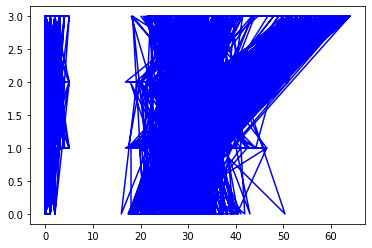

In [14]:
import matplotlib.pyplot as plt

plt.plot(X_train, linear_model.predict(X_train), color='blue')

plt.scatter(X_train, y_train, color='red')

plt.scatter(X_test, y_test, color='green')

plt.show()

In [ ]:
linear_predictions = linear_model.predict( X_test )

print(confusion_matrix(y_test, linear_predictions))

In [ ]:
probabilities = linear_model.predict_proba([[23, 0, 28.88, 0, 0]])

print(probabilities)